In [997]:
#---IMPORTS---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


# **1. First look at the data**
Here we import the data, look at the column names, the data types. We may deal with quick fixes like null values, empty or useless columns.

The data represent prices for used and new heavy equipment including excavators, tractors, combines, dozers, trucks, mowers, applicators etc (you can view all categories at https://www.equipmentradar.com - observe category dropdowns to get an idea of the range of items).
<br/>
<br/>
Dataset contains the following labels:
<br/>
<br/>
category: Machine category such as excavator, dozer, tractor, etc.
<br/>
is_new: Boolean (1=New, 0=Used)
<br/>
manufacturer: Manufacturer such as Caterpillar, John Deere, Case, New Holland, Kubota, etc
<br/>
region: Geographic region in United States
<br/>
price: Price in USD
<br/>
year: Year machine was manufactured
<br/>
meter_hours: Number of hours the machine has been used (similar to odometer on a car). Note that 0 may represent 0 or not reported.

In [998]:
#---READING EXPORTING---
df=pd.read_csv('data.csv') # to read a csv file using pandas
df

,uuid,meter_hours,category,is_new,manufacturer,region,price_usd,year
0,a6fd823a-4369-4737-ad41-b4ac40b77747,0,80,0,96,38,10000,1998
1,b7568591-ba29-4068-b0a3-826215dd03f8,461,111,0,108,71,10000,2010
2,6b819fee-6b16-4325-930d-d4937a289461,0,56,0,30,33,10100,2002
3,1025cf47-6f68-42f5-b649-2c6118e466e1,277,90,0,95,39,10100,2011
4,f6284931-a569-4528-a665-df9c4fedc543,905,87,0,208,35,10100,2011
...,...,...,...,...,...,...,...,...
1737,349300ab-024d-4851-a298-f24f2ce590d0,1848,30,0,76,35,423900,2017
1738,47a48b55-1607-4b92-a4d8-a1740a39d471,58,32,0,131,62,437200,2019
1739,7657a972-6c8d-41ac-a932-53423759f798,415,24,0,30,40,437900,2019
1740,df0ee3be-a3f6-4628-a2f8-6d3a39377ffc,296,24,0,30,74,477700,2019


In [999]:
#---EXPLORING DATA NATURE---
df.columns


Index(['uuid', 'meter_hours', 'category', 'is_new', 'manufacturer', 'region',
       'price_usd', 'year'],
      dtype='object')

In [1000]:
df.dtypes


uuid            object
meter_hours      int64
category         int64
is_new           int64
manufacturer     int64
region           int64
price_usd        int64
year             int64
dtype: object

In [1001]:
df=df.drop(columns=['uuid']) # to remove columns you don't need

In [1002]:
#df['date']=pd.to_datetime(df['date'])
#df['total']=pd.to_numeric(df['total'])

In [1003]:
df.head()

,meter_hours,category,is_new,manufacturer,region,price_usd,year
0,0,80,0,96,38,10000,1998
1,461,111,0,108,71,10000,2010
2,0,56,0,30,33,10100,2002
3,277,90,0,95,39,10100,2011
4,905,87,0,208,35,10100,2011


In [1004]:
df.tail()


,meter_hours,category,is_new,manufacturer,region,price_usd,year
1737,1848,30,0,76,35,423900,2017
1738,58,32,0,131,62,437200,2019
1739,415,24,0,30,40,437900,2019
1740,296,24,0,30,74,477700,2019
1741,1613,30,0,76,35,478000,2016


In [1005]:
df.describe()


,meter_hours,category,is_new,manufacturer,region,price_usd,year
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,3110.847876,69.219288,0.039610,65.294489,39.903559,94179.908152,2012.654994
std,21247.889508,36.929822,0.195096,51.385323,23.842916,91887.446374,5.158357
min,0.000000,0.000000,0.000000,2.000000,0.000000,10000.000000,1990.000000
25%,0.000000,30.000000,0.000000,30.000000,18.000000,30500.000000,2011.000000
50%,1073.500000,65.500000,0.000000,30.000000,40.000000,56200.000000,2014.000000
75%,2916.750000,107.000000,0.000000,96.000000,63.000000,126575.000000,2016.000000
max,595260.000000,125.000000,1.000000,221.000000,79.000000,478000.000000,2020.000000


<Axes: >

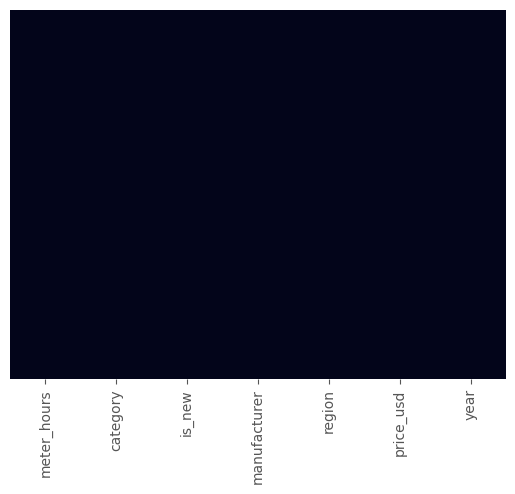

In [1006]:

#---NULL VALUES---
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)


In [1007]:
df.isnull().sum() #to confirm the heatmap


meter_hours     0
category        0
is_new          0
manufacturer    0
region          0
price_usd       0
year            0
dtype: int64

In [1008]:

#df=df.dropna() #drops all rows that have at least one missing value
#df=df.dropna(axis=1) #drops all columns that have at least one null value
#df=df.dropna(how='all') #drops all rows or columns that are 100% null
#df=df.dropna(thresh=3) #drops all rows with 3 or more null values
#df=df.dropna(subset=['target_column']) #drops rows that have a null value in this column

#df['column_with_nulls']=df['column_with_nulls'].fillna(0) #fills null values of that column with 0


In [1009]:
#---REMOVE DUPLICATES---
#df=df.loc[~df.duplicated(subset=['column1', 'column2'])].copy()

In [1010]:
#---REPLACE ANYTHING---
#df['col1'] = df['col1'].replace(0,None)


# **2. Data Exploration**
Now we can do our 1st deep analysis of the data, we'll want to look carefully at each of the variables to find patterns that could be useful when preparing the data, removing outliers or for feature engineering.

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


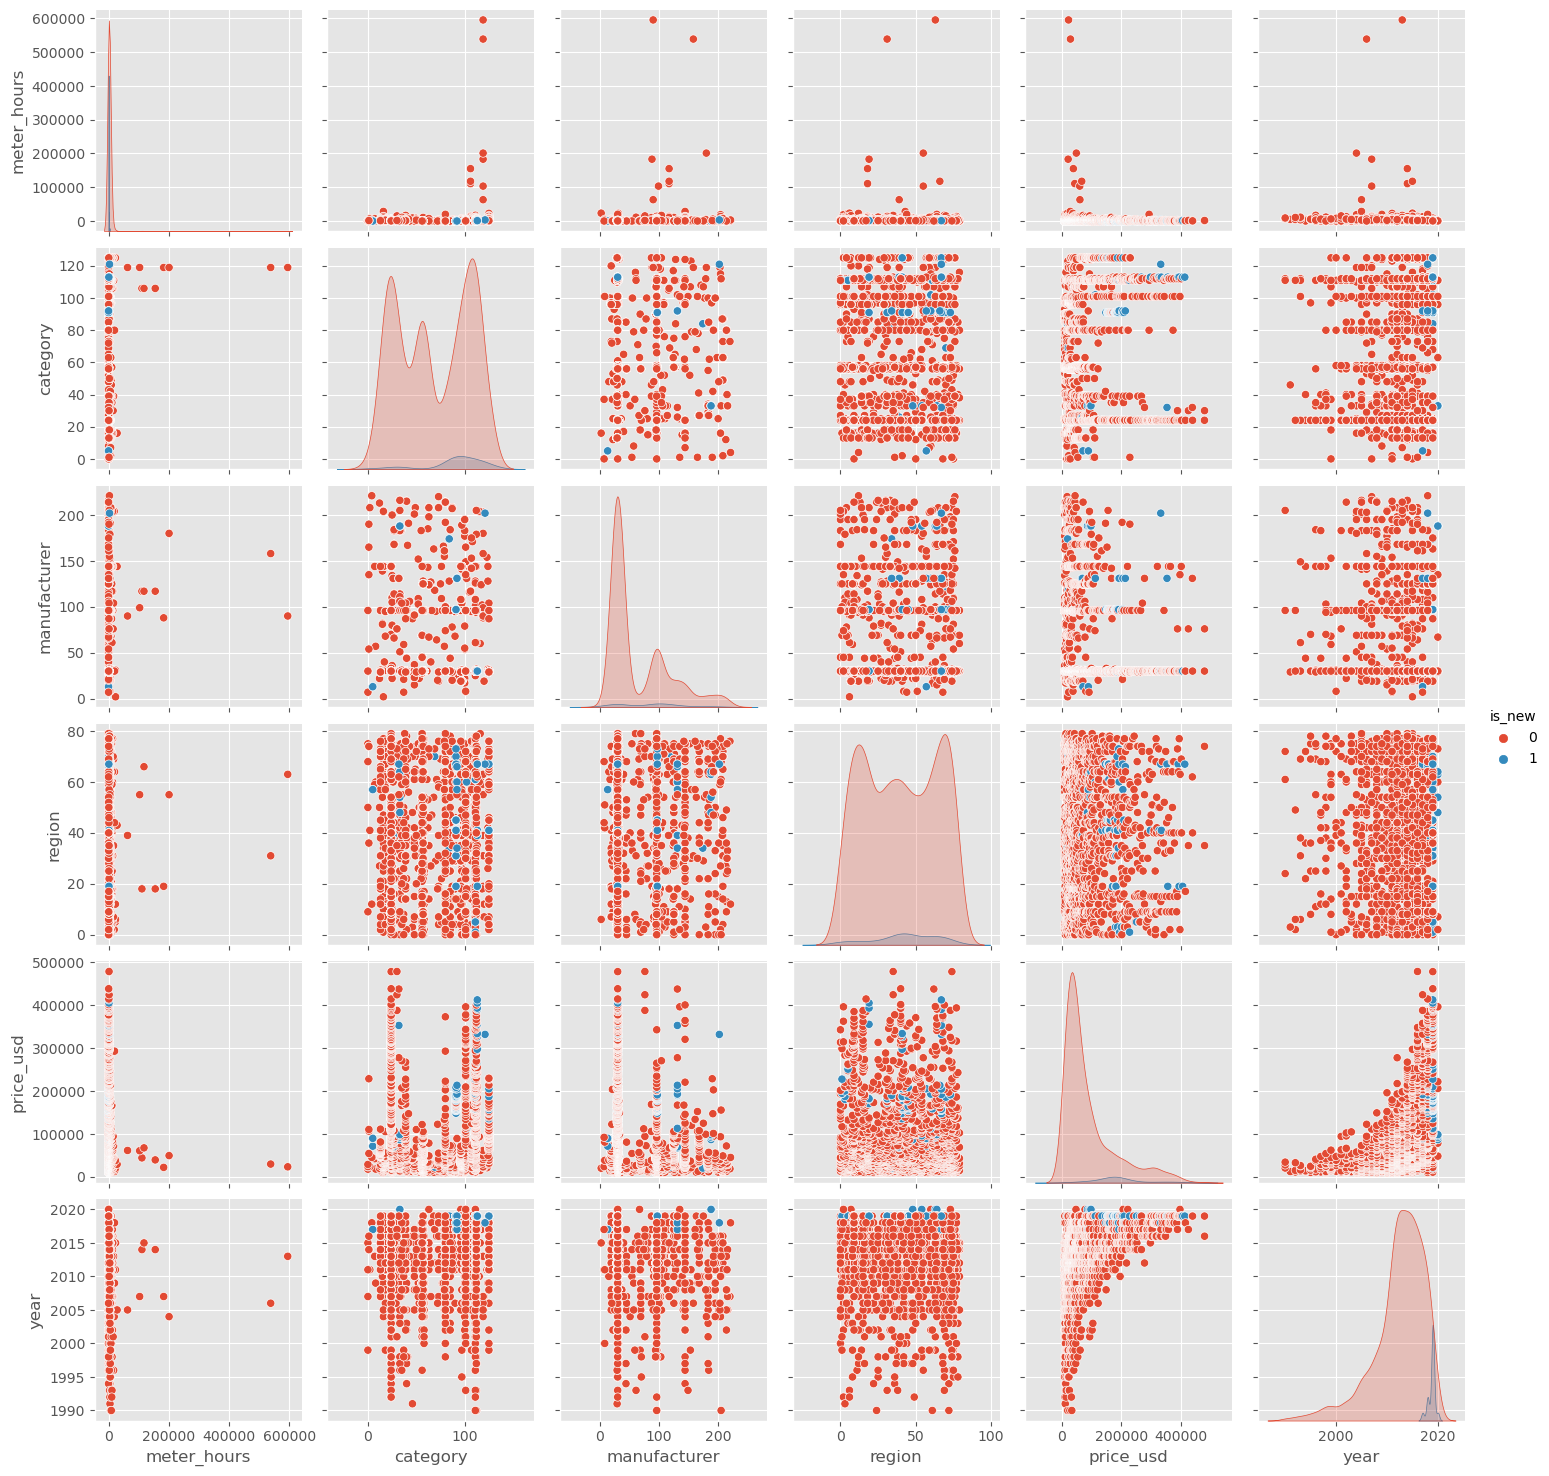

In [1011]:
sns.pairplot(data=df, vars=['meter_hours', 'category', 'manufacturer', 'region', 'price_usd', 'year'], hue='is_new')
plt.show()

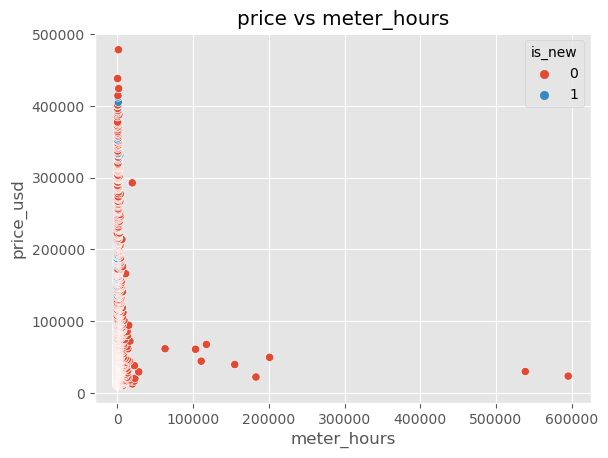

In [1012]:

ax=sns.scatterplot(data=df,x='meter_hours', y='price_usd', hue='is_new')
ax.set_title('price vs meter_hours')
plt.show()


c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


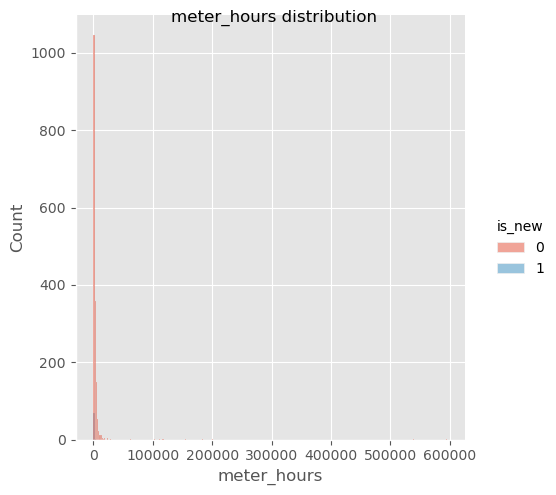

In [1013]:
ax=sns.displot(data=df,x='meter_hours', hue='is_new', binwidth=2000)
ax.fig.suptitle('meter_hours distribution')
plt.show()

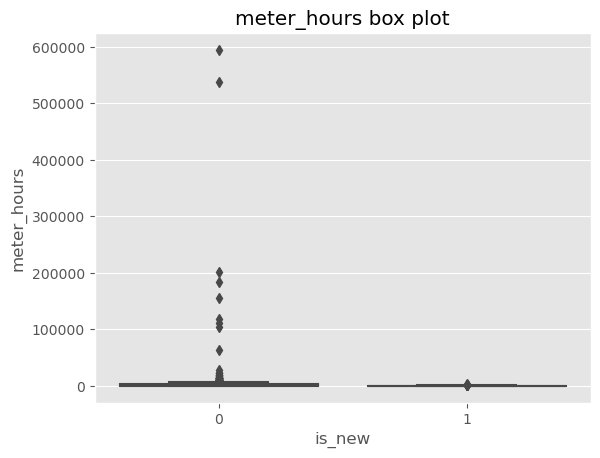

In [1014]:
ax=sns.boxplot(data=df, y='meter_hours', x='is_new')
ax.set_title('meter_hours box plot')
plt.show()

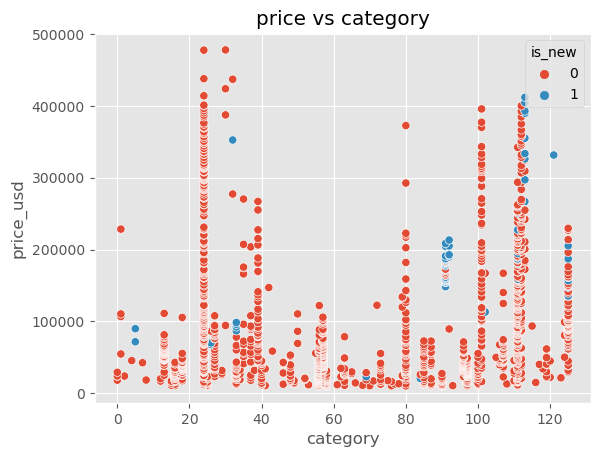

In [1015]:
ax=sns.scatterplot(data=df,x='category', y='price_usd', hue='is_new')
ax.set_title('price vs category')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


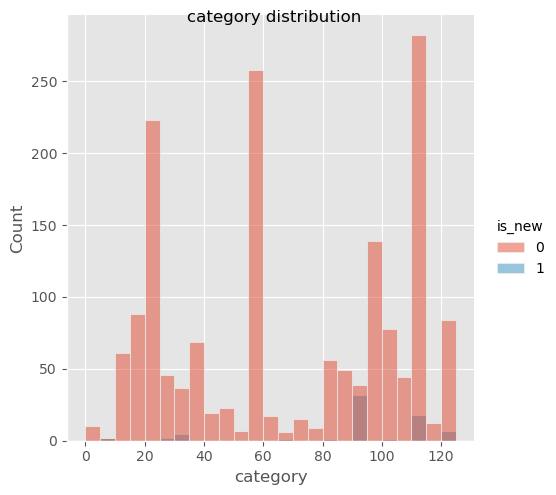

In [1016]:
ax=sns.displot(data=df,x='category', hue='is_new', binwidth=5)
ax.fig.suptitle('category distribution')
plt.show()

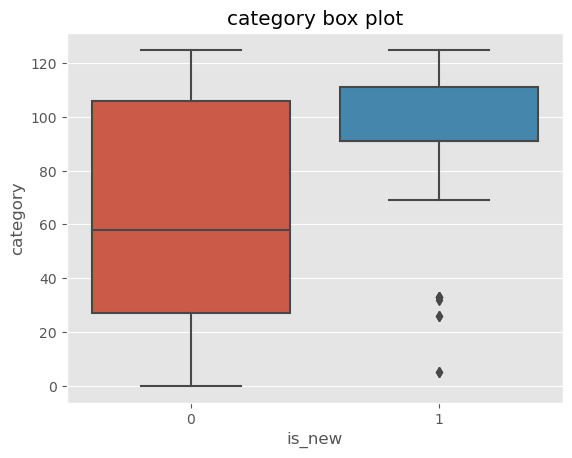

In [1017]:
ax=sns.boxplot(data=df, y='category', x='is_new')
ax.set_title('category box plot')
plt.show()

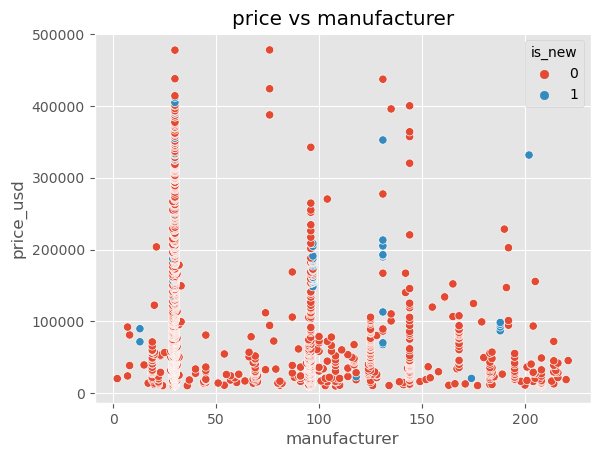

In [1018]:
ax=sns.scatterplot(data=df,x='manufacturer', y='price_usd', hue='is_new')
ax.set_title('price vs manufacturer')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


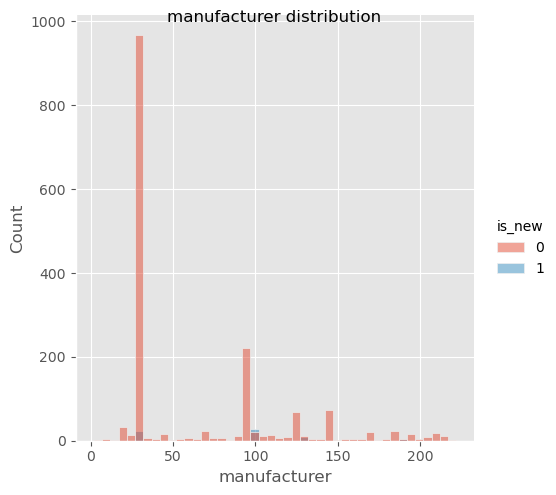

In [1019]:
ax=sns.displot(data=df,x='manufacturer', hue='is_new', binwidth=5)
ax.fig.suptitle('manufacturer distribution')
plt.show()

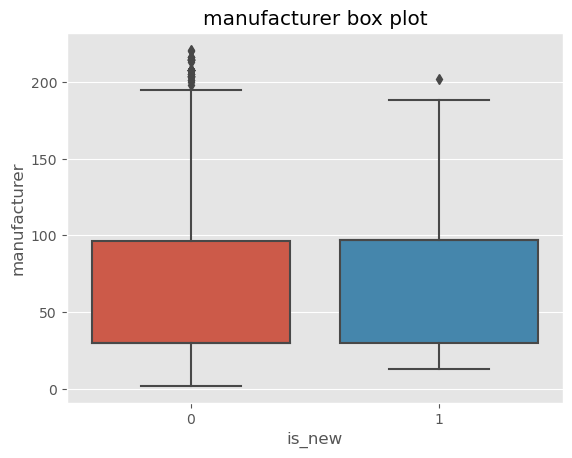

In [1020]:
ax=sns.boxplot(data=df, y='manufacturer', x='is_new')
ax.set_title('manufacturer box plot')
plt.show()

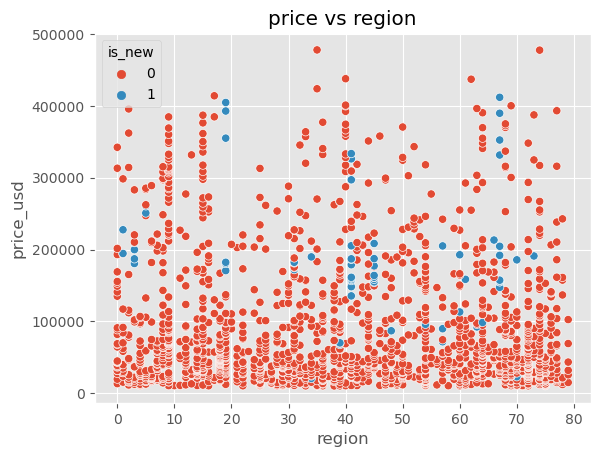

In [1021]:
ax=sns.scatterplot(data=df,x='region', y='price_usd', hue='is_new')
ax.set_title('price vs region')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


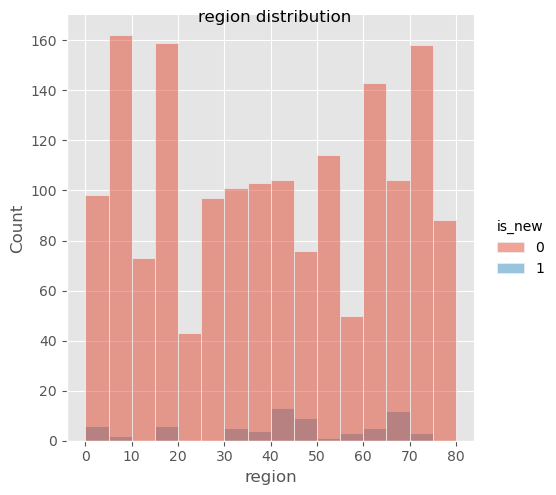

In [1022]:
ax=sns.displot(data=df,x='region', hue='is_new', binwidth=5)
ax.fig.suptitle('region distribution')
plt.show()

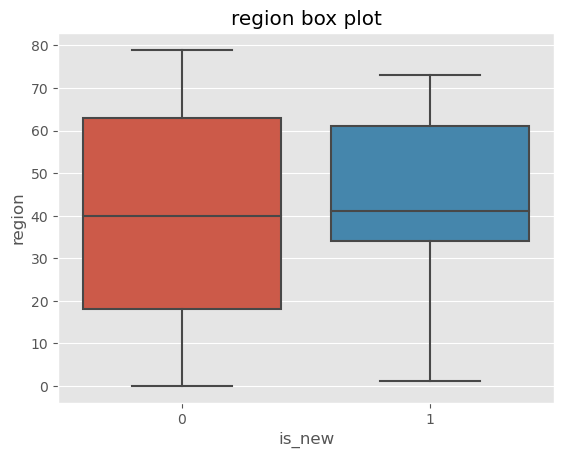

In [1023]:
ax=sns.boxplot(data=df, y='region', x='is_new')
ax.set_title('region box plot')
plt.show()

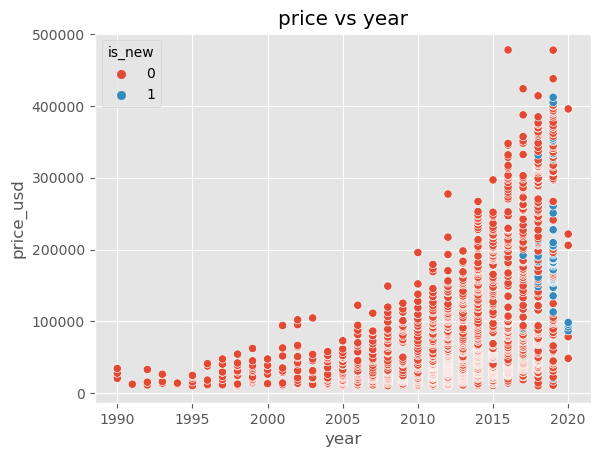

In [1024]:
ax=sns.scatterplot(data=df,x='year', y='price_usd', hue='is_new')
ax.set_title('price vs year')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


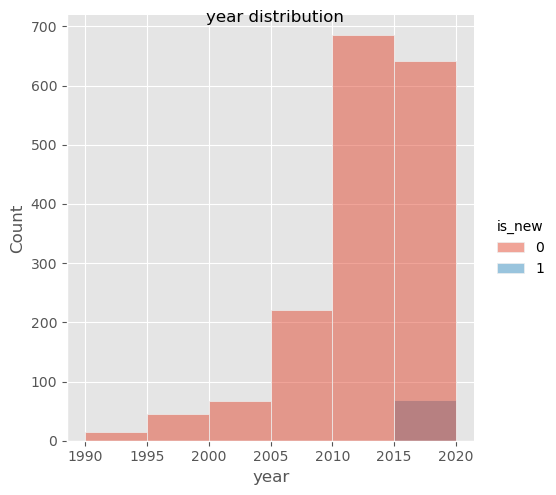

In [1025]:
ax=sns.displot(data=df,x='year', hue='is_new', binwidth=5)
ax.fig.suptitle('year distribution')
plt.show()

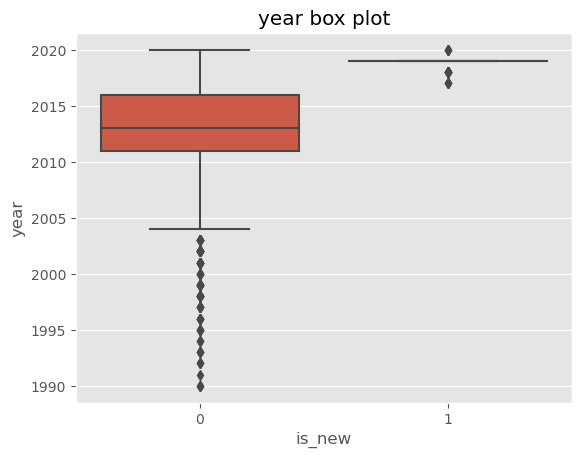

In [1026]:
ax=sns.boxplot(data=df, y='year', x='is_new')
ax.set_title('year box plot')
plt.show()

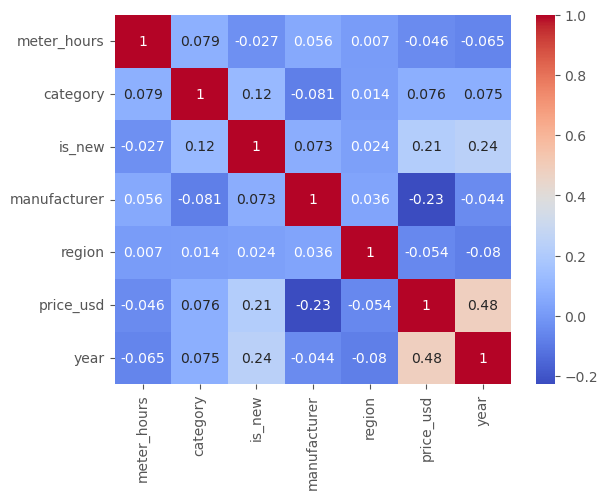

In [1027]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# **3. Data Preparation and Feature Engineering**
After getting to know the data, we have a better idea of which outliers to remove and what new variables que can derive from our data.

In [1028]:
#---OUTLIERS---
df=df.loc[(df['meter_hours'] < df.meter_hours.quantile(0.992))].copy() #very particular way for removing some outliers of a potentially problematic column
#df=df.loc[(df['price_usd'] < df.price_usd.quantile(0.95))].copy()

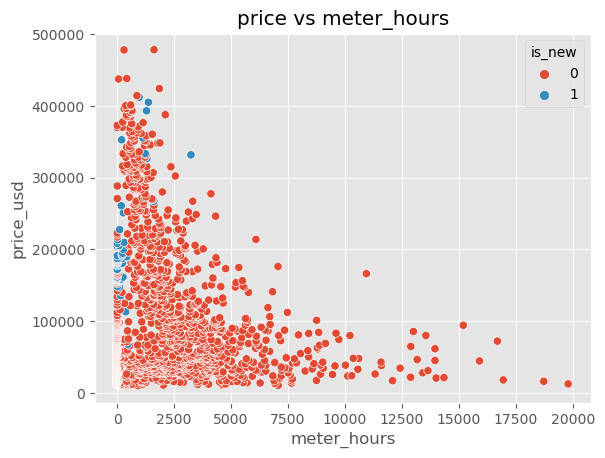

In [1029]:
ax=sns.scatterplot(data=df,x='meter_hours', y='price_usd', hue='is_new')
ax.set_title('price vs meter_hours')
plt.show()

In [1030]:

#---QUERY IN PYTHON---
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

query='''
select *, 
(case when meter_hours <= 10000 then meter_hours*meter_hours else meter_hours end) as meter_hours_sq
from df
'''

df=pysqldf(query)
df['meter_hours_log'] = np.where(df['meter_hours'] > 1,np.log10(df['meter_hours']),np.nan)
df['year_sqrt'] = np.sqrt(df['year']).astype(int)
df

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,meter_hours,category,is_new,manufacturer,region,price_usd,year,meter_hours_sq,meter_hours_log,year_sqrt
0,0,80,0,96,38,10000,1998,0,NaN,44
1,461,111,0,108,71,10000,2010,212521,2.663701,44
2,0,56,0,30,33,10100,2002,0,NaN,44
3,277,90,0,95,39,10100,2011,76729,2.442480,44
4,905,87,0,208,35,10100,2011,819025,2.956649,44
...,...,...,...,...,...,...,...,...,...,...
1723,1848,30,0,76,35,423900,2017,3415104,3.266702,44
1724,58,32,0,131,62,437200,2019,3364,1.763428,44
1725,415,24,0,30,40,437900,2019,172225,2.618048,44
1726,296,24,0,30,74,477700,2019,87616,2.471292,44


# **4. 2nd Data Exploration**
We need to do the same exploration with the cleaned data and new variables. Here we can evaluate if the feature engineering actually makes sense and can add predictive power to our model.

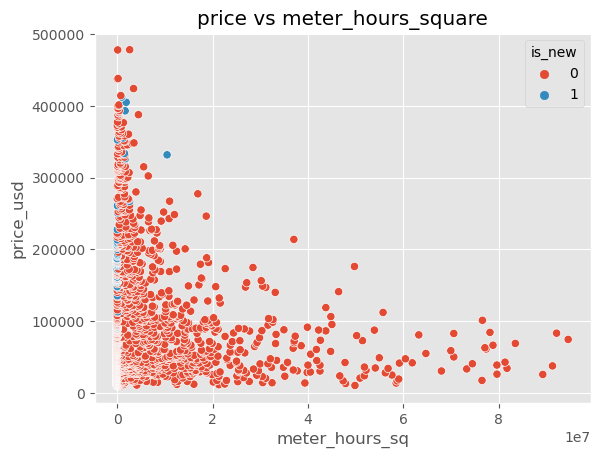

In [1031]:
ax=sns.scatterplot(data=df,x='meter_hours_sq', y='price_usd', hue='is_new')
ax.set_title('price vs meter_hours_square')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


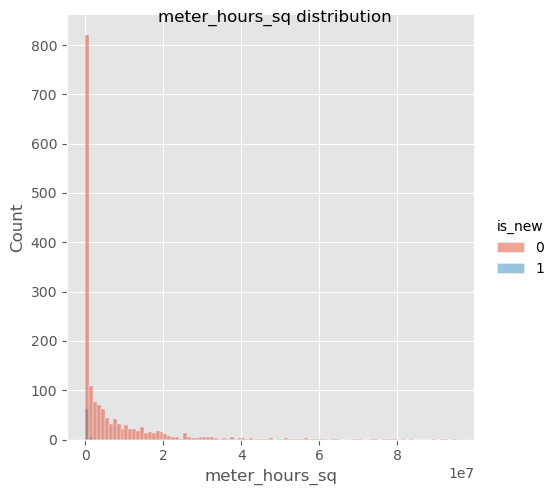

In [1032]:
ax=sns.displot(data=df,x='meter_hours_sq', hue='is_new', binwidth=1000000)
ax.fig.suptitle('meter_hours_sq distribution')
plt.show()

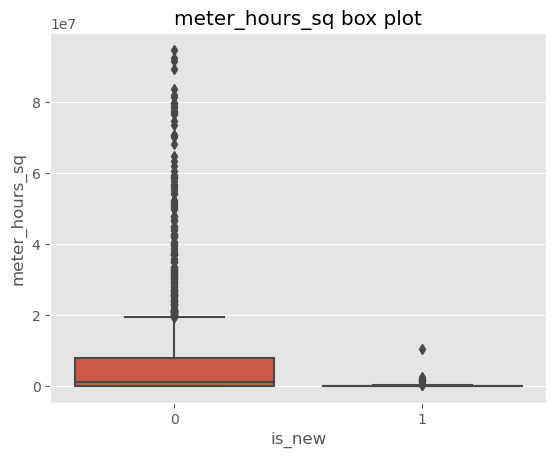

In [1033]:
ax=sns.boxplot(data=df, y='meter_hours_sq', x='is_new')
ax.set_title('meter_hours_sq box plot')
plt.show()

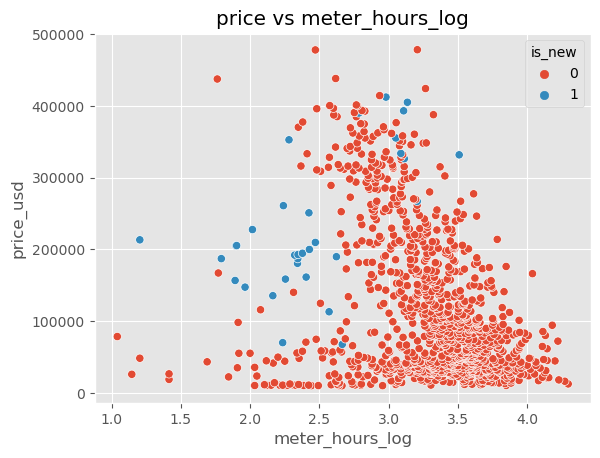

In [1034]:
ax=sns.scatterplot(data=df,x='meter_hours_log', y='price_usd', hue='is_new')
ax.set_title('price vs meter_hours_log')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


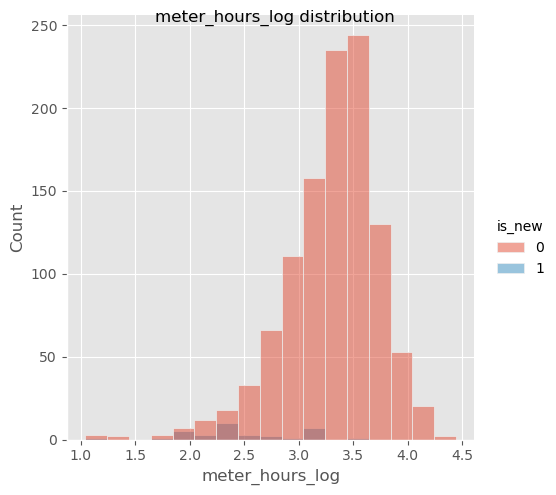

In [1035]:
ax=sns.displot(data=df,x='meter_hours_log', hue='is_new', binwidth=0.2)
ax.fig.suptitle('meter_hours_log distribution')
plt.show()

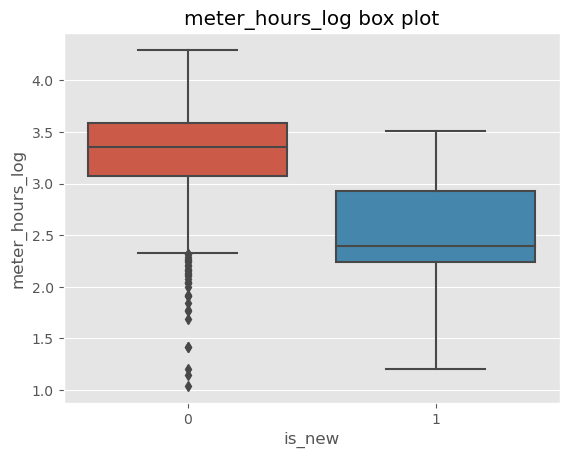

In [1036]:
ax=sns.boxplot(data=df, y='meter_hours_log', x='is_new')
ax.set_title('meter_hours_log box plot')
plt.show()

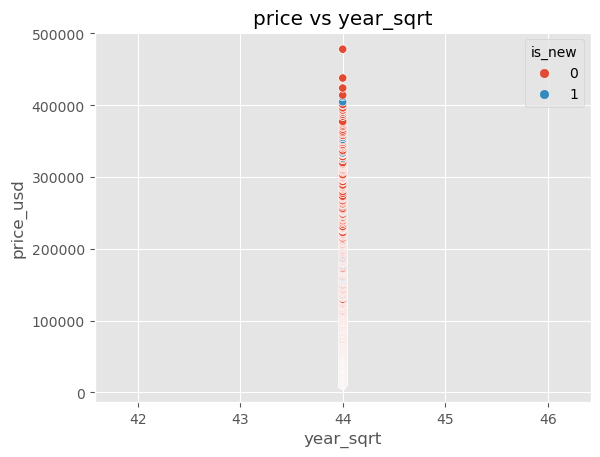

In [1037]:
ax=sns.scatterplot(data=df,x='year_sqrt', y='price_usd', hue='is_new')
ax.set_title('price vs year_sqrt')
plt.show()

In [1038]:
df=df.drop(columns=['year_sqrt'])
df

,meter_hours,category,is_new,manufacturer,region,price_usd,year,meter_hours_sq,meter_hours_log
0,0,80,0,96,38,10000,1998,0,NaN
1,461,111,0,108,71,10000,2010,212521,2.663701
2,0,56,0,30,33,10100,2002,0,NaN
3,277,90,0,95,39,10100,2011,76729,2.442480
4,905,87,0,208,35,10100,2011,819025,2.956649
...,...,...,...,...,...,...,...,...,...
1723,1848,30,0,76,35,423900,2017,3415104,3.266702
1724,58,32,0,131,62,437200,2019,3364,1.763428
1725,415,24,0,30,40,437900,2019,172225,2.618048
1726,296,24,0,30,74,477700,2019,87616,2.471292


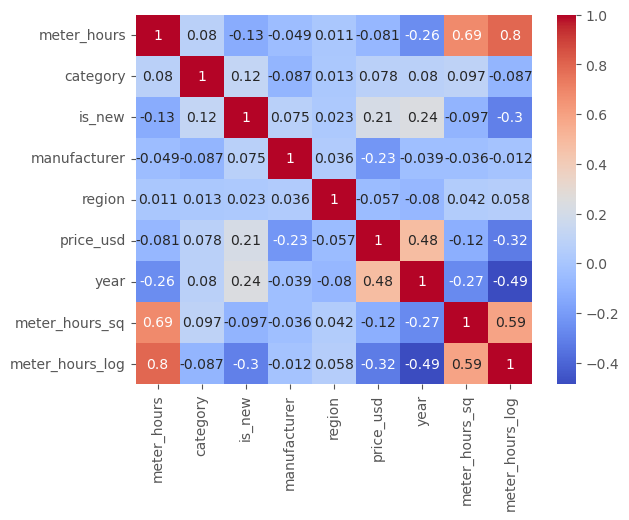

In [1039]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# **5. Model Creation**
From the nature of the problem you can identify which kind of algorithm you need (clasificator, regressor, clustering, anomalies, etc.) and with the data analysis you can know  which one of the many options of regressors to choose (in case it's a regressor): linear regression, XGBoostRegressor, lightGBMRegressor, DecisionTrees, RandomForest, etc.
<br/>
<br/>
We'll also experiment with different combinations for the hyperparameters of the models which will differ depending on the model.

In [1040]:
#---PREPARE TEST AND TRAIN DATA---
from sklearn.model_selection import train_test_split

x=df.drop(['price_usd'], axis=1)
y=df.price_usd

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=4)


In [1041]:

#---USING XGBRegressor---
import xgboost as xgb

model_original=xgb.XGBRegressor(eta=0.2, max_depth=10, n_estimators=500)
model_original.fit(x_train.drop(columns=['meter_hours_sq', 'meter_hours_log']), y_train)

model_features=xgb.XGBRegressor(eta=0.2, max_depth=10, n_estimators=500)
model_features.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [1042]:

# Make predictions on the test data
y_pred_original = model_original.predict(x_test.drop(columns=['meter_hours_sq', 'meter_hours_log']))

y_pred_features = model_features.predict(x_test)

# **6. Model Evaluation**
There are different evaluation metrics that we can use depending on the nature of the algorithm the situation needs you to use. 
<br/>
<br/>
For regressors: R square, MSE, MAE, LMSQE.
<br/>
For classificators: Accuracy, precision, recall, ROC curve.

In [1043]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("EVALUATION FOR MODEL WITH ORIGINAL VARIABLES")
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred_original)
print("Mean Squared Error:", mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_original)
print("Mean Absolute Error:", mae)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred_original)
print("R-squared:", r2)

print('')
print('')

print("EVALUATION FOR MODEL WITH FEATURES")
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred_features)
print("Mean Squared Error:", mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_features)
print("Mean Absolute Error:", mae)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred_features)
print("R-squared:", r2)

EVALUATION FOR MODEL WITH ORIGINAL VARIABLES
Mean Squared Error: 1235785493.6142936
Mean Absolute Error: 21028.555585975133
R-squared: 0.8636937311460098


EVALUATION FOR MODEL WITH FEATURES
Mean Squared Error: 1496935441.220134
Mean Absolute Error: 21858.20896179552
R-squared: 0.8348890760068248


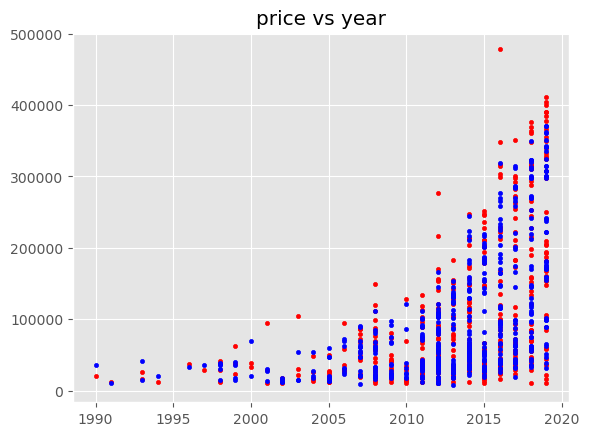

In [1044]:
plt.scatter(x_test['year'], y_test, c='r',marker='.')
plt.scatter(x_test['year'], y_pred_original, c='b',marker='.')
plt.title('price vs year')
plt.show()

c:\Users\YT8MA4Q\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


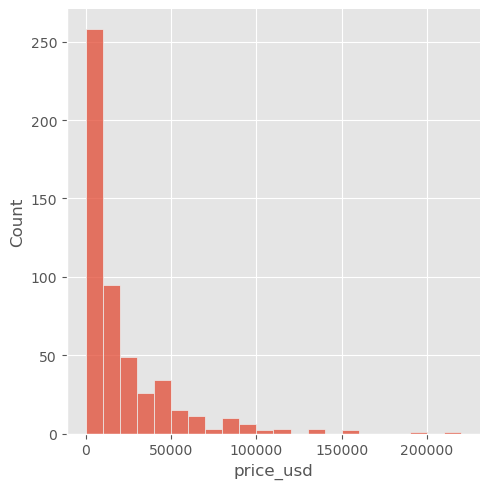

In [1045]:
error_original = abs(y_pred_original - y_test)
sns.displot(data=error_original, binwidth=10000)
plt.show()

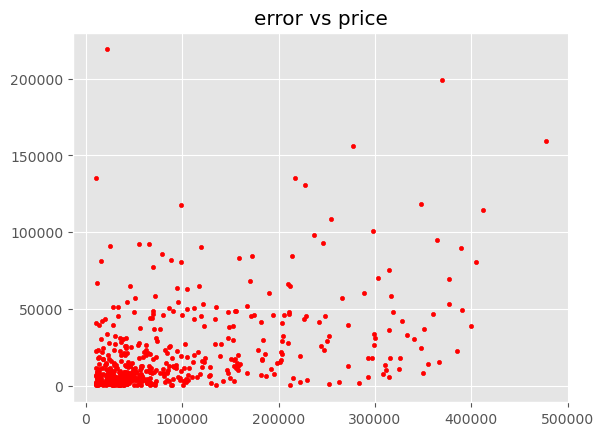

In [1046]:
plt.scatter(y_test, error_original, c='r',marker='.')
plt.title('error vs price')
plt.show()

From the resuluts of the evaluation it would appear that the model trained only with the original features has better performance, this shows that feature engineering may not always be necessary and sometimes we could be better off developing simple models without overthinking the feature engineering step.